<a href="https://colab.research.google.com/github/sharifulla01/Early-Brain-Stroke-Prediction-by-ML/blob/main/Early_brain_stroke_prediction_by_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
data = pd.read_csv("/content/brain_stroke.csv")
data.head()



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


**Performing Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
data["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data.shape

(4981, 11)

**Performing Exploratory Data Analysis**

In [ ]:
data=data.drop(["Residence_type"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   avg_glucose_level  4981 non-null   float64
 7   bmi                4981 non-null   float64
 8   smoking_status     4981 non-null   object 
 9   stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 389.3+ KB


In [ ]:
data.drop_duplicates()
data

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,83.94,30.0,smokes,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data.columns:
    if data[i].dtype == "object":
        data[i]=enc.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   avg_glucose_level  4981 non-null   float64
 7   bmi                4981 non-null   float64
 8   smoking_status     4981 non-null   int64  
 9   stroke             4981 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 389.3 KB


heatmap

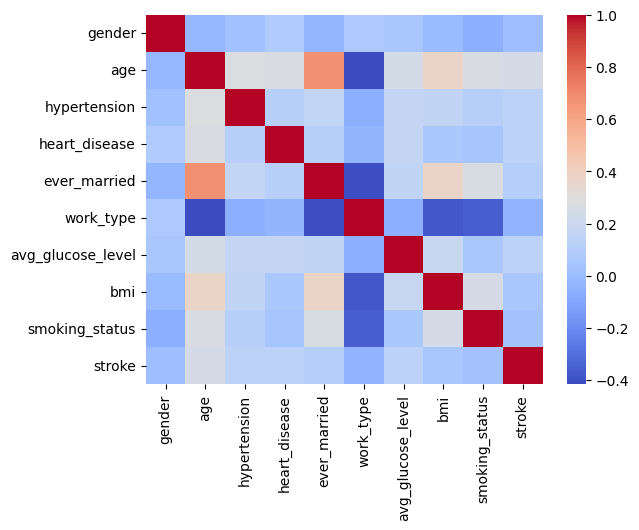

In [ ]:
sns.heatmap(data.corr(), cmap='coolwarm')

# Show the plot
plt.show()

**Visualization of  Descriptive Analysis**

In [ ]:
cm = sns.light_palette("green", as_cmap=True)

In [ ]:
data.describe().T.style.background_gradient(cmap=cm)

,count,mean,std,min,25%,50%,75%,max
gender,4981.000000,0.416382,0.493008,0.000000,0.000000,0.000000,1.000000,1.000000
age,4981.000000,43.419859,22.662755,0.080000,25.000000,45.000000,61.000000,82.000000
hypertension,4981.000000,0.096165,0.294848,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,4981.000000,0.055210,0.228412,0.000000,0.000000,0.000000,0.000000,1.000000
ever_married,4981.000000,0.658502,0.474260,0.000000,0.000000,1.000000,1.000000,1.000000
work_type,4981.000000,1.302349,0.860170,0.000000,1.000000,1.000000,2.000000,3.000000
avg_glucose_level,4981.000000,105.943562,45.075373,55.120000,77.230000,91.850000,113.860000,271.740000
bmi,4981.000000,28.498173,6.790464,14.000000,23.700000,28.100000,32.600000,48.900000
smoking_status,4981.000000,1.379442,1.072180,0.000000,0.000000,2.000000,2.000000,3.000000
stroke,4981.000000,0.049789,0.217531,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
fig = px.imshow(data.describe().T, text_auto=True, aspect="auto")
fig.show()

In [ ]:
fig = px.imshow(data.cov(), text_auto=True, aspect="auto")
fig.show()

In [ ]:
data.corr().style.background_gradient(cmap=cm)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.026538,0.021485,0.086476,-0.028971,0.065784,0.055796,-0.012093,-0.062666,0.008870
age,-0.026538,1.000000,0.278120,0.264852,0.677137,-0.415935,0.236763,0.373703,0.265623,0.246478
hypertension,0.021485,0.278120,1.000000,0.111974,0.164534,-0.061618,0.170028,0.158762,0.110045,0.131965
heart_disease,0.086476,0.264852,0.111974,1.000000,0.114765,-0.036943,0.166847,0.060926,0.048093,0.134610
ever_married,-0.028971,0.677137,0.164534,0.114765,1.000000,-0.406439,0.150724,0.371690,0.262384,0.108398
work_type,0.065784,-0.415935,-0.061618,-0.036943,-0.406439,1.000000,-0.059658,-0.382418,-0.356738,-0.041835
avg_glucose_level,0.055796,0.236763,0.170028,0.166847,0.150724,-0.059658,1.000000,0.186348,0.064089,0.133227
bmi,-0.012093,0.373703,0.158762,0.060926,0.371690,-0.382418,0.186348,1.000000,0.243111,0.056926
smoking_status,-0.062666,0.265623,0.110045,0.048093,0.262384,-0.356738,0.064089,0.243111,1.000000,0.027463
stroke,0.008870,0.246478,0.131965,0.134610,0.108398,-0.041835,0.133227,0.056926,0.027463,1.000000


In [ ]:
fig = px.imshow(data.corr(), text_auto=True, aspect="auto")
fig.show()

In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Pie Chart**

Relationship with Gender

In [ ]:
fig = px.pie(data, values='stroke',names='gender',title='Percentage of Stroke according to Gender')
fig.show()

In [ ]:
fig = px.pie(data, values='hypertension',names='gender',title='Percentage of Hypertension according to Gender')
fig.show()

In [ ]:
fig = px.pie(data, values='heart_disease',names='gender',title='Percentage of Heart Disease according to Gender')
fig.show()

Relationship with Married people

In [ ]:
fig = px.pie(data, values='stroke',names='ever_married',title='Percentage of Stroke according to Marriage Status')
fig.show()

In [ ]:
fig = px.pie(data, values='heart_disease',names='ever_married',title='Percentage of Heart Disease according to Marriage Status')
fig.show()

Relationship with Work type

In [ ]:
fig = px.pie(data, values='stroke',names='work_type',title='Percentage of Stroke according to Working Type')
fig.show()

In [ ]:
fig = px.pie(data, values='hypertension',names='work_type',title='Percentage of Hypertension according to Working Type')
fig.show()

In [ ]:
fig = px.pie(data, values='heart_disease',names='work_type',title='Percentage of Heart disease according to Working Type')
fig.show()

Relationship with Smoking Status

In [ ]:
fig = px.pie(data, values='stroke',names='smoking_status' ,title='Percentage of Heart Disease according to Smoking Status')
fig.show()

In [ ]:
fig = px.pie(data, values='hypertension',names='smoking_status',title='Percentage of Hypertension according to Smoking Status')
fig.show()

In [ ]:
fig = px.pie(data, values='heart_disease',names='smoking_status',title='Percentage of Heart Disease according to Smoking Status')
fig.show()

**BarPlot**

Barplot of Gender

In [ ]:
gender_counts = data['gender'].value_counts()

fig = go.Figure(data=go.Bar(x=gender_counts.index, y=gender_counts.values))
fig.update_layout(title='Gender Distribution',
                  xaxis_title='Gender',
                  yaxis_title='Count')
fig.show()

Barplot of Age

In [ ]:
age_counts = data["age"].value_counts()

fig = go.Figure(data=go.Bar(x=age_counts.index, y=age_counts.values))
fig.update_layout(title='Age Distribution',
                  xaxis_title='Age',
                  yaxis_title='Count')
fig.show()

Barplot of Hypertension

In [ ]:
hypertension_counts = data["hypertension"].value_counts()
fig = go.Figure(data=go.Bar(x=hypertension_counts.index, y=hypertension_counts.values))
fig.update_layout(title='Hypertension Distribution',
                  xaxis_title='hypertension',
                  yaxis_title='Count')
fig.show()

Barplot of Heart Disease

In [ ]:
heart_disease_counts = data['heart_disease'].value_counts()
fig = go.Figure(data=go.Bar(x=heart_disease_counts.index, y=heart_disease_counts.values))
fig.update_layout(title='Heart Disease Distribution',
                  xaxis_title='Heart Disease',
                  yaxis_title='Count')
fig.show()

Barplot of Marriage people

In [ ]:
ever_married_counts = data['ever_married'].value_counts()
fig = go.Figure(data=go.Bar(x=ever_married_counts.index, y=ever_married_counts.values))
fig.update_layout(title='Ever Married Distribution',
                  xaxis_title='Ever Married',
                  yaxis_title='Count')
fig.show()

Barplot of Work_type

In [ ]:
work_type_counts = data['work_type'].value_counts()

fig = go.Figure(data=go.Bar(x=work_type_counts.index, y=work_type_counts.values))
fig.update_layout(title='Work Type Distribution',
                  xaxis_title='Work Type',
                  yaxis_title='Count')
fig.show()

Barplot of BMI

In [ ]:
bmi_counts = data['bmi'].value_counts()


fig = go.Figure(data=go.Bar(x=bmi_counts.index, y=bmi_counts.values))
fig.update_layout(title='BMI Distribution',
                  xaxis_title='BMI',
                  yaxis_title='Count')
fig.show()

In [ ]:
y = data["stroke"]
x= data.drop(["stroke"], axis =1)

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
scaler = StandardScaler()
x=scaler.fit_transform(x)
x=Normalizer().fit_transform(x)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(x, y)
x_resampled.shape,y_resampled.shape

((9466, 9), (9466,))

**Normalizing the independent**

**1. Splitting data (60-40)**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled ,test_size=0.40, random_state=0)

**Building Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
model = RandomForestClassifier(random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.981
Precision score: 0.981
Recall score: 0.981
F1 score: 0.981


**2. Splitting data (70-30)**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled ,test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
model = RandomForestClassifier(random_state=0)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.985
Precision score: 0.985
Recall score: 0.985
F1 score: 0.985


**RFMODEL02 - Adjusting n_estimators = 10, n_jobs = 1**

In [ ]:
model02=RandomForestClassifier(n_estimators=10, n_jobs=1,random_state=0)
model02.fit(x_train,y_train)
y_pred=model02.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.988
Precision score: 0.989
Recall score: 0.988
F1 score: 0.988


**RFMODEL03 - Adjusting n_estimators = 50, n_jobs = 2**

In [ ]:
model03=RandomForestClassifier(n_estimators=10, n_jobs=1,max_depth=500,random_state=0)
model03.fit(x_train,y_train)
y_pred=model03.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.988
Precision score: 0.989
Recall score: 0.988
F1 score: 0.988


**RFMODEL04 - Adjusting n_estimators = 100, n_jobs = 3**

In [ ]:
model04=RandomForestClassifier(n_estimators=100, n_jobs=3,random_state=0)
model04.fit(x_train,y_train)
y_pred=model04.predict(x_test)

print("Accuracy score: %.3f"%accuracy_score(y_test, y_pred))
print("Precision score: %.3f"%precision_score(y_test, y_pred, average='macro'))
print("Recall score: %.3f"%recall_score(y_test, y_pred, average='macro'))
print("F1 score: %.3f"%f1_score(y_test, y_pred, average='macro'))

Accuracy score: 0.985
Precision score: 0.985
Recall score: 0.985
F1 score: 0.985


**Visualizing the metrics with adjustments in data splitting(training & testing)**

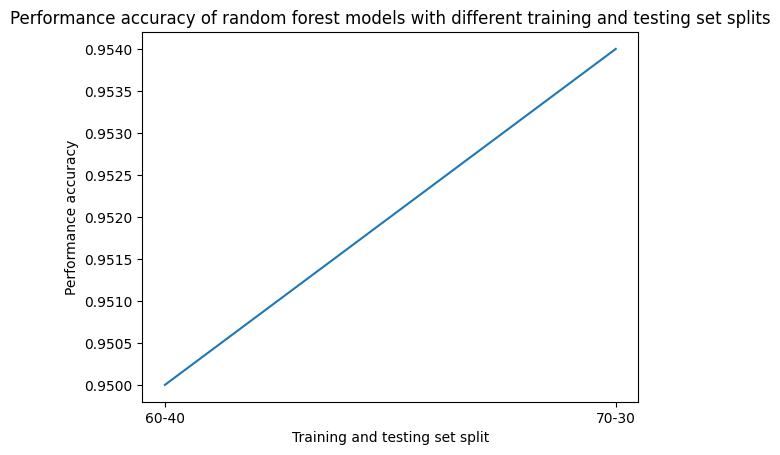

In [ ]:
import matplotlib.pyplot as plt

#list of the performance accuracies
accuracies = [0.950, 0.954]

#list of the training and testing set splits
splits = ['60-40', '70-30']

# Plot the performance accuracy of each model against the training and testing set split
plt.plot(splits, accuracies)
plt.xlabel('Training and testing set split')
plt.ylabel('Performance accuracy')
plt.title('Performance accuracy of random forest models with different training and testing set splits')
plt.show()


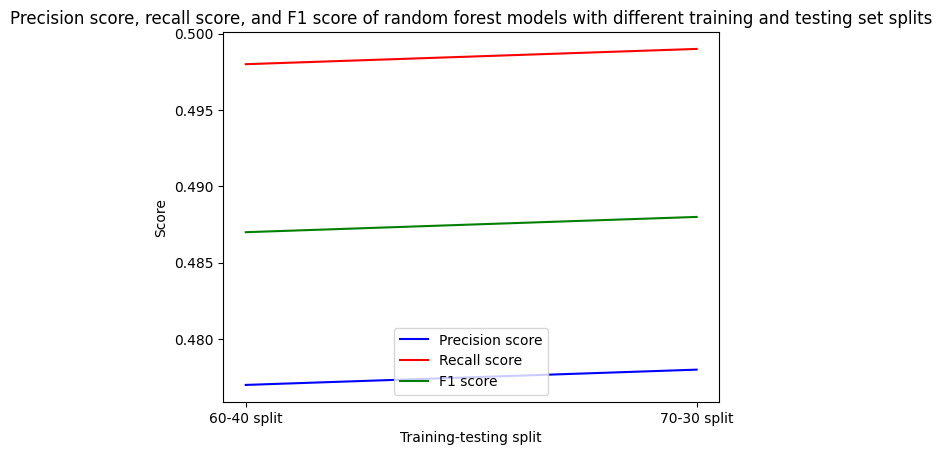

In [ ]:
import matplotlib.pyplot as plt

precision_scores = [0.477, 0.478]
recall_scores = [0.498, 0.499]
f1_scores = [0.487, 0.488]
colors = ['blue', 'red']
labels = ['60-40 split', '70-30 split']

fig, ax = plt.subplots()
# Set the x-axis labels to be the training-testing splits
ax.set_xticks([0, 1])
ax.set_xticklabels(labels)

# Plot the precision scores, recall scores, and F1 scores
ax.plot(precision_scores, label='Precision score', color=colors[0])
ax.plot(recall_scores, label='Recall score', color=colors[1])
ax.plot(f1_scores, label='F1 score', color='green')

# Set the title of the plot
ax.set_title('Precision score, recall score, and F1 score of random forest models with different training and testing set splits')
ax.set_xlabel('Training-testing split')
ax.set_ylabel('Score')

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

# Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

class_prior = [0.3, 0.7]

model_nb = GaussianNB(priors=class_prior)
model_nb.fit(x_train, y_train)
y_pred_nb = model_nb.predict(x_test)

# Calculate and print evaluation metrics
print("Naive Bayes Accuracy score: %.3f" % accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Precision score: %.3f" % precision_score(y_test, y_pred_nb, average='macro'))
print("Naive Bayes Recall score: %.3f" % recall_score(y_test, y_pred_nb, average='macro'))
print("Naive Bayes F1 score: %.3f" % f1_score(y_test, y_pred_nb, average='macro'))



Naive Bayes Accuracy score: 0.737
Naive Bayes Precision score: 0.745
Naive Bayes Recall score: 0.738
Naive Bayes F1 score: 0.736


# Multi-layer Perceptron Model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Scale the input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize and train the Multi-layer Perceptron classifier with increased max_iter
mlp = MLPClassifier(max_iter=1000, random_state=40)
mlp.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_mlp = mlp.predict(x_test_scaled)

# Evaluate the performance of the MLP classifier


print("Multi-layer Perceptron Accuracy Score: %.3f" % accuracy_score(y_test, y_pred_mlp))
print("Multi-layer Perceptron Precision Score: %.3f" % precision_score(y_test, y_pred_mlp, average='macro'))
print("Multi-layer Perceptron Recall Score: %.3f" % recall_score(y_test, y_pred_mlp, average='macro'))
print("Multi-layer Perceptron F1 Score Score: %.3f" % f1_score(y_test, y_pred_mlp, average='macro'))


Multi-layer Perceptron Accuracy Score: 0.930
Multi-layer Perceptron Precision Score: 0.935
Multi-layer Perceptron Recall Score: 0.930
Multi-layer Perceptron F1 Score Score: 0.930


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train the Decision Tree model
model_dt = DecisionTreeClassifier(max_depth=200, random_state=40)
model_dt.fit(x_train, y_train)

# Predict on the test set
y_pred_dt = model_dt.predict(x_test)

# Evaluate the performance of the Decision Tree model

print("Decision Tree Accuracy Score: %.3f" % accuracy_score(y_test, y_pred_dt))
print("Decision Tree Precision Score: %.3f" % precision_score(y_test, y_pred_dt, average='macro'))
print("Decision Tree Recall Score %.3f:" % recall_score(y_test, y_pred_dt, average='macro'))
print("Decision Tree F1 Score: %.3f" % f1_score(y_test, y_pred_dt, average='macro'))


Decision Tree Accuracy Score: 0.970
Decision Tree Precision Score: 0.972
Decision Tree Recall Score 0.971:
Decision Tree F1 Score: 0.970


# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and fit the Gradient Boosting model
model_gboost = GradientBoostingClassifier(n_estimators=500, learning_rate=0.3, random_state=40)
model_gboost.fit(x_train, y_train)

# Predict on the test set using the Gradient Boosting model
y_pred_gboost = model_gboost.predict(x_test)

# Evaluate the performance of the Gradient Boosting model

print("Gradient Boosting Model:")
print("Gradient Boosting Accuracy Score: %.3f" % accuracy_score(y_test, y_pred_gboost))
print("Gradient Boosting Precision Score: %.3f" % precision_score(y_test, y_pred_gboost, average='macro'))
print("Gradient Boosting Recall Score %.3f:" % recall_score(y_test, y_pred_gboost, average='macro'))
print("Gradient Boosting F1 Score: %.3f" % f1_score(y_test, y_pred_gboost, average='macro'))


Gradient Boosting Model:
Gradient Boosting Accuracy Score: 0.973
Gradient Boosting Precision Score: 0.974
Gradient Boosting Recall Score 0.973:
Gradient Boosting F1 Score: 0.973


# XGBoost (Extreme Gradient Boosting) algorithm

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train XGBoost
model_xgb = XGBClassifier(n_estimators=500, learning_rate=0.3, random_state=40)
model_xgb.fit(x_train, y_train)

# Predict on the test set
y_pred_xgb = model_xgb.predict(x_test)

# Evaluate the performance of XGBoost
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='macro')
recall = recall_score(y_test, y_pred_xgb, average='macro')
f1 = f1_score(y_test, y_pred_xgb, average='macro')

print("XGBoost Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


XGBoost Model:
Accuracy: 0.9788732394366197
Precision: 0.9796195652173914
Recall: 0.9789915966386555
F1 Score: 0.9788681671260111


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(x_train, y_train)
y_pred_knn = model_knn.predict(x_test)

# Evaluation metrics for KNN
print("K-Nearest Neighbors Accuracy score: %.3f" % accuracy_score(y_test, y_pred_knn))
print("K-Nearest Neighbors Precision score: %.3f" % precision_score(y_test, y_pred_knn, average='macro'))
print("K-Nearest Neighbors Recall score: %.3f" % recall_score(y_test, y_pred_knn, average='macro'))
print("K-Nearest Neighbors F1 score: %.3f" % f1_score(y_test, y_pred_knn, average='macro'))


K-Nearest Neighbors Accuracy score: 0.963
K-Nearest Neighbors Precision score: 0.966
K-Nearest Neighbors Recall score: 0.964
K-Nearest Neighbors F1 score: 0.963


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


model_lr = LogisticRegression(max_iter=500)
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)

# Evaluation metrics for Logistic Regression
print("Logistic Regression Accuracy score: %.3f" % accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Precision score: %.3f" % precision_score(y_test, y_pred_lr, average='macro'))
print("Logistic Regression Recall score: %.3f" % recall_score(y_test, y_pred_lr, average='macro'))
print("Logistic Regression F1 score: %.3f" % f1_score(y_test, y_pred_lr, average='macro'))


Logistic Regression Accuracy score: 0.760
Logistic Regression Precision score: 0.763
Logistic Regression Recall score: 0.760
Logistic Regression F1 score: 0.759


# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the base estimator (in this case, a Decision Tree)
base_estimator = DecisionTreeClassifier(max_depth=10)

adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=200)

# Train the Adaboost model
adaboost_model.fit(x_train, y_train)

# Predict using the Adaboost model
y_pred_adaboost = adaboost_model.predict(x_test)

# Calculate and print evaluation metrics
print("Adaboost Accuracy score: %.3f" % accuracy_score(y_test, y_pred_adaboost))
print("Adaboost Precision score: %.3f" % precision_score(y_test, y_pred_adaboost, average='macro'))
print("Adaboost Recall score: %.3f" % recall_score(y_test, y_pred_adaboost, average='macro'))
print("Adaboost F1 score: %.3f" % f1_score(y_test, y_pred_adaboost, average='macro'))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Adaboost Accuracy score: 0.995
Adaboost Precision score: 0.995
Adaboost Recall score: 0.995
Adaboost F1 score: 0.995


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Support Vector Classifier (SVC) with additional parameters
svm_model = SVC(kernel='rbf', C=70.0, gamma='scale', degree=3)


# Train the SVM model
svm_model.fit(x_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_model.predict(x_test)

# Calculate and print evaluation metrics
print("SVM Accuracy score: %.3f" % accuracy_score(y_test, y_pred_svm))
print("SVM Precision score: %.3f" % precision_score(y_test, y_pred_svm, average='macro'))
print("SVM Recall score: %.3f" % recall_score(y_test, y_pred_svm, average='macro'))
print("SVM F1 score: %.3f" % f1_score(y_test, y_pred_svm, average='macro'))


SVM Accuracy score: 0.902
SVM Precision score: 0.911
SVM Recall score: 0.903
SVM F1 score: 0.902
